<a href="https://colab.research.google.com/github/veunseov/teacher-eunseo/blob/main/%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EC%9B%8C%EB%93%9C_%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EB%B9%84%EC%A3%BC%EC%96%BC%EB%9D%BC%EC%9D%B4%EC%A7%95_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%BD%94%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [파이썬 실전 프로젝트 ] 다음 영화 리뷰 데이터 스크래핑 실습
### * 코드 원본 출처 : 박진수 교수님(서울대학교 경영대)
####* 코드 및 마크다운 편집 : 성원경 선생님(경기기계공업고등학교 컴퓨터전자과)

Edit by Wonking 2021.


# 1. 프로젝트 목표---
## 목표 1. 다음 영화 리뷰에서 특정 영화의 리뷰를 웹크롤링 하여 txt 파일로 만든다.

## 목표 2. 영화의 리뷰를 긍정적인 코멘트, 부정적 코멘트로 분류하여 워드 클라우드 형태로 코멘트를 비쥬얼 라이징 한다.

<프로젝트 결과 예시 : 죽은시인의 사회 영화 긍정 리뷰 워드 클라우드>

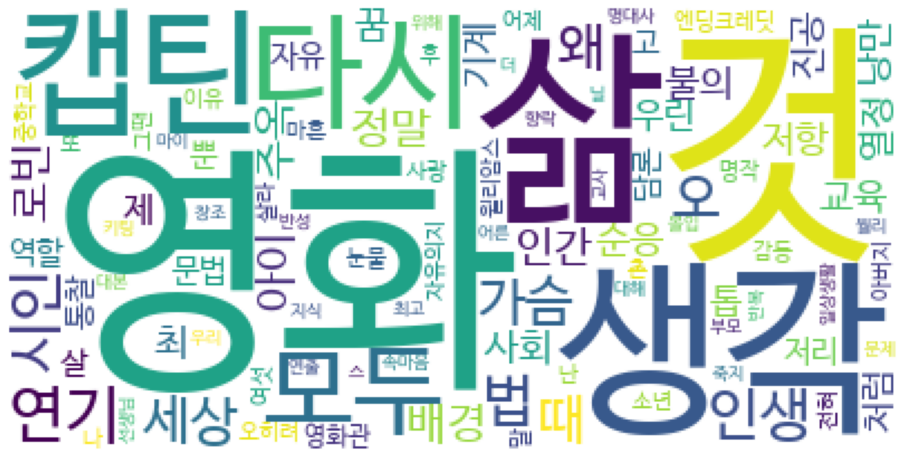

# 2. 프로젝트 코드

*

---
## 코드 1. 필요 패키지 및 드라이버 설치
---

*

In [ ]:
!pip install selenium #html 웹페이지를 제어할 수 있는 패키지
!apt-get update  #apt: 외부 드라이브 설치
!apt install chromium-chromedriver

     |████████████████████████████████| 958 kB 3.7 MB/s 
     |████████████████████████████████| 356 kB 40.5 MB/s 
     |████████████████████████████████| 138 kB 67.1 MB/s 
     |████████████████████████████████| 3.6 MB 48.9 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 58 kB 4.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.down

*

---
##코드 2. 다음 영화 리뷰 사이트 접속 후 리뷰 한줄 가져오기
---

*



[다음영화 리뷰 사이트 url](https://movie.daum.net/moviedb/grade?movieId=2725)



In [ ]:

# --- 셀레니움 각종 함수들 불러오기
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait   # 해당 태그를 기다림
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# 옵션 설정 후 Selenium으로 해당 사이트에 접속한다.
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver', options=options)


# movie ID만 바꾸면 다른 영화 리뷰 데이터를 수집할 수 있다.
movie_id = '2725' # 죽은시인의 사회(1989)의 다음 영화 번호 2725   (다음영화리뷰 영화제목 검색하기)
URL = 'https://movie.daum.net/moviedb/grade?movieId=' + movie_id

# Selenium으로 영화 리뷰 웹사이트에 접속한다.
browser.get(URL)


# 인터넷 환경을 고려해 10초 내에 다음 영화 리뷰 사이트에 'desc_txt...' 이란 클래스가 있는지 확인
# 다음 영화 리뷰 웹사이트에서 HTML 코드 분석 하면 리뷰는 'desc_txt...' 이란 클래스에 들어있다.

try:    # 정상 처리
    review = WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    # 해당 태그 존재 여부를 확인하기까지 10초 기다림

except TimeoutException:    # 예외 처리
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')


# 첫 번째 찾은 리뷰 코멘트를 가져온다.
review = browser.find_element_by_class_name('desc_txt')

# 리뷰 텍스트로 보기
review.text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


'교육이란 순응하는법을 가르치는게아니라 불의에 저항하는법을 가르치는것이다'

### 두잇 Your self code 1
 -> 다음 영화 사이트에서 별점을 출력해 보세요.
 first_score 변수에 다음 리뷰 점수를 스크래핑 해서 점수를 출력해 보시오.

In [ ]:
# 두잇 유어셀프 코드 1 직접 짜기


    


### 코드1 정답

In [ ]:
# 두잇 유얼셀프 코드1 입력

first_score = browser.find_element_by_class_name('ratings')
first_score.text

'9'



---
## 코드 3. 한페이지의 모든 리뷰 가져오기
---
*












In [ ]:
# 다수의 정보를 가져올땐 elemet가 아닌 elemets!!
reviews = browser.find_elements_by_class_name('desc_txt')
scores = browser.find_elements_by_class_name('ratings')

for review in reviews:
  print('>>', review.text.replace('\n', ' '))

for score in scores:
  print(score.text, end='점, ')


>> 교육이란 순응하는법을 가르치는게아니라 불의에 저항하는법을 가르치는것이다
>> 당시 대학입시에 찌들어  힘들었던 우리들에게 많은 공감을 주었던  .
>> 어제 생각나서 다시보니 정말 명작 전혀 촌스럽지않고 오히려 배경이 너무 멋지고 소년들도 멋지고 로빈윌리암스는 안타깝고 정말 또 봐도 감동적인 영화
>> 인생 최의 영화. 시인이 죽은 사회는 낭만과 꿈과 열정이 사라진 진공의 세상이다. 기계가 돌아가듯 우린 톱니처럼 그저 제 역할만 하면 그뿐.... 자유와 시인이 살아 숨쉬는 세상을 꿈꾼다는 것이 어리석은 생각일까? 영화는 고지식한 문법같은 담론을 뒤늦게 가슴 저리게 통찰하게 한다. 고1 때, 왜 영화관 엔딩크레딧에서 난 왜 하염없이 눈물을 흘렸었는지 그땐 이유도 몰랐다. 캡틴, 오 나의 캡틴..... 자유의지를 사랑하게 해줘서 감사합니다!
>> 중학교때 본후 마흔 여섯의 다시보게 됬습니다. 두아이의 아버지가 돼서 보니 두렵습니다.  아이들에겐 하고싶은거 하는 삶을 살라고 말해주곤 하지만 속마음은 그렇지 않습니다. 반성합니다.
>> 전통, 명예, 규율, 최고를 규칙으로 하는 명문기숙학교... 우리나라의 닫혀있는 교육제도와도 별반 다르지 않아 보려 숨막혔다.  이 학교 동문이자 새로 부임한 영어쌤 존 키팅.  부모와 학교의 틀에 얽매여 살아가는 17세 소년들에게 키팅쌤의 영어 강의는 참으로 새로웠다.  "카르페 디엠" 현재를 즐기라. 인생을 독특하게 살아라. ~ 이 영화의 명대사  키팅쌤이 학창시절에 참여했던 '죽은 시인의 사회' 클럽에 대해 듣게 된 아이들은 비밀모임을 갖는다.  연극을 하고 싶은 닐, 그러나 의대만을 강요하는 아버지. 결국 자살하고 만다.  닐의 부모는 이 모든 것이 전통을 뒤엎는 교육자 키팅탓이라고 여기며 징계를 요구한다.  같은 클럽 친구들은 부모와 학교측의 강요에 못이겨 모든 잘못을 키팅쌤에게 돌린다.  키팅쌤은
>> 캡틴 마이 캡틴
>> 보편적인 한국교육을 받아온 절대다수의 사람들이라면 좋을 수 밖에 없는 영화.
>> 한마디면 충분하

In [ ]:
# --- 10개인지 확인한다. 
# 만약 10개가 아니라면 그 이유는?
# 만약 둘의 수치가 다르다면 그 이유는?
print('\n영화 리뷰 수 : ', len(reviews), '\n영화 별점 수 : ', len(scores))


영화 리뷰 수 :  10 
영화 별점 수 :  10


In [ ]:
# 리뷰 관련 모든 정보를 가져온다.
review_elems = browser.find_elements_by_class_name('cmt_info')

# 영화 리뷰 평가 점수와 코멘트를 담을 리스트를 초기화 한다.
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트


try:    # 정상 처리
    review = WebDriverWait(browser, 20).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'desc_txt'))
    )    # 해당 태그 존재 여부를 확인하기까지 10초 기다림

except TimeoutException:    # 예외 처리
    print('해당 페이지에 리뷰 정보가 존재하지 않습니다.')

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
for review_elem in review_elems:
  # --- 아래 방법은 결측치를 하나 하나 예외 처리를 하기 때문에 시간은 상대적으로 상당히 오래 걸릴 수 있다.
  ratings.append(review_elem.find_element_by_class_name('ratings').text)
  try:
    comments.append(review_elem.find_element_by_class_name('desc_txt').text.replace('\n', ' '))
  except NoSuchElementException:
    comments.append('')

# --- 결과를 출력한다.    
for i, score in enumerate(ratings):
  print(f'{score}점, 리뷰: {comments[i]}')

10점, 리뷰: 교육이란 순응하는법을 가르치는게아니라 불의에 저항하는법을 가르치는것이다
10점, 리뷰: 당시 대학입시에 찌들어  힘들었던 우리들에게 많은 공감을 주었던  .
10점, 리뷰: 어제 생각나서 다시보니 정말 명작 전혀 촌스럽지않고 오히려 배경이 너무 멋지고 소년들도 멋지고 로빈윌리암스는 안타깝고 정말 또 봐도 감동적인 영화
10점, 리뷰: 인생 최의 영화. 시인이 죽은 사회는 낭만과 꿈과 열정이 사라진 진공의 세상이다. 기계가 돌아가듯 우린 톱니처럼 그저 제 역할만 하면 그뿐.... 자유와 시인이 살아 숨쉬는 세상을 꿈꾼다는 것이 어리석은 생각일까? 영화는 고지식한 문법같은 담론을 뒤늦게 가슴 저리게 통찰하게 한다. 고1 때, 왜 영화관 엔딩크레딧에서 난 왜 하염없이 눈물을 흘렸었는지 그땐 이유도 몰랐다. 캡틴, 오 나의 캡틴..... 자유의지를 사랑하게 해줘서 감사합니다!
10점, 리뷰: 중학교때 본후 마흔 여섯의 다시보게 됬습니다. 두아이의 아버지가 돼서 보니 두렵습니다.  아이들에겐 하고싶은거 하는 삶을 살라고 말해주곤 하지만 속마음은 그렇지 않습니다. 반성합니다.
10점, 리뷰: 전통, 명예, 규율, 최고를 규칙으로 하는 명문기숙학교... 우리나라의 닫혀있는 교육제도와도 별반 다르지 않아 보려 숨막혔다.  이 학교 동문이자 새로 부임한 영어쌤 존 키팅.  부모와 학교의 틀에 얽매여 살아가는 17세 소년들에게 키팅쌤의 영어 강의는 참으로 새로웠다.  "카르페 디엠" 현재를 즐기라. 인생을 독특하게 살아라. ~ 이 영화의 명대사  키팅쌤이 학창시절에 참여했던 '죽은 시인의 사회' 클럽에 대해 듣게 된 아이들은 비밀모임을 갖는다.  연극을 하고 싶은 닐, 그러나 의대만을 강요하는 아버지. 결국 자살하고 만다.  닐의 부모는 이 모든 것이 전통을 뒤엎는 교육자 키팅탓이라고 여기며 징계를 요구한다.  같은 클럽 친구들은 부모와 학교측의 강요에 못이겨 모든 잘못을 키팅쌤에게 돌린다.  키팅쌤은
10점, 리뷰: 캡틴 마이 캡틴
10점, 리뷰: 보편적인 한

# 두잇 Your self code 2
 -> 스코어 점수를 별갯수로 표현해 보세요

 <결과 예시>
 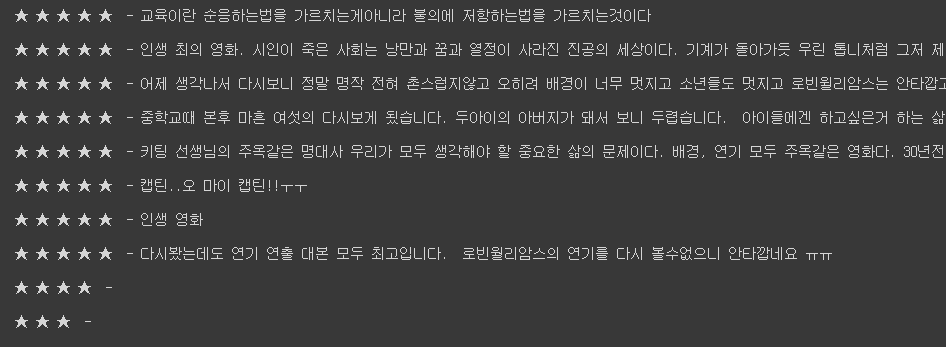


In [ ]:
## 두잇유여셀프 코드 2

# --- 결과를 출력한다.    
for i, score in enumerate(ratings):


SyntaxError: ignored

### 코드2 정답공개

In [ ]:

# --- 결과를 출력한다.    
for i, score in enumerate(ratings):
    for j in range(int(int(score)/2)) :
        print('★', end = ' ')
    print(f' - {comments[i]}')
    print('')

★ ★ ★ ★ ★  - 교육이란 순응하는법을 가르치는게아니라 불의에 저항하는법을 가르치는것이다

★ ★ ★ ★ ★  - 당시 대학입시에 찌들어  힘들었던 우리들에게 많은 공감을 주었던  .

★ ★ ★ ★ ★  - 어제 생각나서 다시보니 정말 명작 전혀 촌스럽지않고 오히려 배경이 너무 멋지고 소년들도 멋지고 로빈윌리암스는 안타깝고 정말 또 봐도 감동적인 영화

★ ★ ★ ★ ★  - 인생 최의 영화. 시인이 죽은 사회는 낭만과 꿈과 열정이 사라진 진공의 세상이다. 기계가 돌아가듯 우린 톱니처럼 그저 제 역할만 하면 그뿐.... 자유와 시인이 살아 숨쉬는 세상을 꿈꾼다는 것이 어리석은 생각일까? 영화는 고지식한 문법같은 담론을 뒤늦게 가슴 저리게 통찰하게 한다. 고1 때, 왜 영화관 엔딩크레딧에서 난 왜 하염없이 눈물을 흘렸었는지 그땐 이유도 몰랐다. 캡틴, 오 나의 캡틴..... 자유의지를 사랑하게 해줘서 감사합니다!

★ ★ ★ ★ ★  - 중학교때 본후 마흔 여섯의 다시보게 됬습니다. 두아이의 아버지가 돼서 보니 두렵습니다.  아이들에겐 하고싶은거 하는 삶을 살라고 말해주곤 하지만 속마음은 그렇지 않습니다. 반성합니다.

★ ★ ★ ★ ★  - 전통, 명예, 규율, 최고를 규칙으로 하는 명문기숙학교... 우리나라의 닫혀있는 교육제도와도 별반 다르지 않아 보려 숨막혔다.  이 학교 동문이자 새로 부임한 영어쌤 존 키팅.  부모와 학교의 틀에 얽매여 살아가는 17세 소년들에게 키팅쌤의 영어 강의는 참으로 새로웠다.  "카르페 디엠" 현재를 즐기라. 인생을 독특하게 살아라. ~ 이 영화의 명대사  키팅쌤이 학창시절에 참여했던 '죽은 시인의 사회' 클럽에 대해 듣게 된 아이들은 비밀모임을 갖는다.  연극을 하고 싶은 닐, 그러나 의대만을 강요하는 아버지. 결국 자살하고 만다.  닐의 부모는 이 모든 것이 전통을 뒤엎는 교육자 키팅탓이라고 여기며 징계를 요구한다.  같은 클럽 친구들은 부모와 학교측의 강요에 못이겨 모든 잘못을 키팅쌤에게 돌린다.  키팅쌤은

★ ★

---
# 코드 4. 평점 더보기 버튼을 자동으로 눌러 모든 리뷰와 별점 데이터 가져오기
---

In [ ]:
print('Unfolding movie review pages:')
click = 0  # '평점 더보기' 버튼을 누른 횟수를 계산하기 위한 변수를 초기화한다.
print('Counting pages...')

# 리뷰 페이지 맨 아래에 있는 '평점 더보기' 버튼을 누른다,
# 첫 페이지는 10개의 리뷰를 보여준다.
# 버튼 한 개 누를 때마다 5개의 추가 리뷰를 보여준다.
XPATH = '''//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'''
while True:
  try:  # 페이지가 너무 길어 필요하다면 충분히 30초 이상 대기 시간을 주는게 좋다.
    WebDriverWait(browser, 10).until(EC.presence_of_element_located(
      (By.XPATH, XPATH))).click()
      
    # --- 진행 상태를 보여준다.
    click += 1
    print(click) if click % 20 == 0 else print(click, end='|')
  except TimeoutException:  # '평점 더보기' 버튼이 없으면 중단한다.
    print('Done!')
    break

In [ ]:
# 영화 리뷰 데이터를 담을 리스트를 모두 초기화 한다.
ratings = []    # 네티즌 평가 점수
comments = []   # 네티즌 리뷰 코멘트

# 영화 리뷰 관련 모든 정보를 가져와서 리스트에 담는다.
print('Extracting movie reviews...')
review_elems = browser.find_elements_by_class_name('cmt_info')
for review_elem in review_elems:
  # --- 아래 방법은 결측치를 하나 하나 예외 처리를 하기 때문에 시간은 상대적으로 상당히 오래 걸릴 수 있다.
  ratings.append(review_elem.find_element(By.CLASS_NAME, 'ratings').text)
  try:
    comments.append(review_elem.find_element(By.CLASS_NAME, 
                        'desc_txt').text.replace('\n', ' '))
  except:
    comments.append('')
else:
  # browser.close()
  print('\n--- Job completed!', 
        f'총 {len(review_elems):,}개의 리뷰 데이터를 수집했습니다.', 
        '-' * 11, '\n')     

In [ ]:
# --- 수집한 리뷰의 수를 확인한다.
print(f'총 리뷰 개수.......: {len(comments):,}개')
print(f'총 리뷰 평점 개수...: {len(ratings):,}개')

# --- 수집한 리뷰 중 첫 10개만 출력해본다.
for i, score in enumerate(ratings[:10]):
  print(f'{score} - {comments[i]}')

filename_reviews = 'movie-reviews.txt'

# 리뷰 전체 내용을 텍스트 파일 쓰기 모드로 연다.
with open(filename_reviews, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    file.write(score + '|')           # 각 리뷰의 평점을 텍스트 파일로 쓴 후
    file.write(comments[i] + '\n')    # 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.

print(f"수집한 데이터를 '{filename_reviews}'로 저장하였습니다.")

from google.colab import files
files.download('movie-reviews.txt')

---
# 코드 5. 긍정 코멘트, 부정 코멘트 분류하기
---

In [ ]:
pos_comments = []  # 긍정 리뷰들을 담을 리스트를 초기화한다.
neg_comments = []  # 부정 리뷰들을 담을 리스트를 초기화한다.

# --- 긍정과 부정 리뷰만 따로 구분하여 감성분석에 사용할 내용을 텍스트 파일 쓰기 모드로 연다. 
filename = 'movie-reviews-senti.txt'  # 저장할 파일 이름을 설정한다.
with open(filename, mode='w', encoding='utf-8') as file:
  for i, score in enumerate(ratings):
    # 긍정(grade >= 9)과 부정(grade <= 4) 리뷰만 따로 저장한다.
    grade = int(score)
    if 5 < grade < 9: continue            # 평점이 6~8인 리뷰는 제외한다.

    if len(comments[i]) < 4: continue     # 내용이 너무 짧은 리뷰는 제외한다.

    if grade >= 9:                        # 긍정 리뷰면 --------------
      label = '1 '                         # '1' 라벨을 부여하고
      pos_comments.append(comments[i])    # 긍정 리뷰를 긍정 리뷰 리스트에 추가한다.
    else:                                 # 부정 리뷰면 --------------
      label = '0 '                         # '0' 라벨을 부여하고
      neg_comments.append(comments[i])    # 부정 리뷰를 부정 리뷰 리스트에 추가한다.            
    
    file.write(label + '| ')               # 긍정 또는 부정 라벨을 텍스트 파일로 쓴 후
    file.write(comments[i] + '\n')        # 각 리뷰를 줄 단위로 텍스트 파일에 쓴다.
  else:
    print(f'긍정 리뷰 개수: {len(pos_comments):,}개\n부정 리뷰 개수: {len(neg_comments):,}개')

print(f"분류한 데이터를 '{filename}'로 저장하였습니다.")

# --- 로컬 파일로 내려받기를 한다.
from google.colab import files
files.download(filename)

# 긍정 리뷰 전체 개수와 첫 샘플 다섯 개를 출력한다.
print(f'긍정 리뷰...: {len(pos_comments):,}개')
for review in pos_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

# 부정 리뷰 전체 개수와 첫 샘플 다섯 개를 출력한다.
print(f'부정 리뷰...: {len(neg_comments):,}개')
for review in neg_comments[:10]:
  print('\t', review)
else:
  print('\t', '...', end='\n\n')

# 수집한 긍정과 부정 리뷰 전체 개수를 출력한다.
print(f'리뷰 총계...: {len(pos_comments) + len(neg_comments):,}개')

긍정 리뷰 개수: 8개
부정 리뷰 개수: 0개
분류한 데이터를 'movie-reviews-senti.txt'로 저장하였습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

긍정 리뷰...: 8개
	 교육이란 순응하는법을 가르치는게아니라 불의에 저항하는법을 가르치는것이다
	 인생 최의 영화. 시인이 죽은 사회는 낭만과 꿈과 열정이 사라진 진공의 세상이다. 기계가 돌아가듯 우린 톱니처럼 그저 제 역할만 하면 그뿐.... 자유와 시인이 살아 숨쉬는 세상을 꿈꾼다는 것이 어리석은 생각일까? 영화는 고지식한 문법같은 담론을 뒤늦게 가슴 저리게 통찰하게 한다. 고1 때, 왜 영화관 엔딩크레딧에서 난 왜 하염없이 눈물을 흘렸었는지 그땐 이유도 몰랐다. 캡틴, 오 나의 캡틴..... 자유의지를 사랑하게 해줘서 감사합니다!
	 어제 생각나서 다시보니 정말 명작 전혀 촌스럽지않고 오히려 배경이 너무 멋지고 소년들도 멋지고 로빈윌리암스는 안타깝고 정말 또 봐도 감동적인 영화
	 중학교때 본후 마흔 여섯의 다시보게 됬습니다. 두아이의 아버지가 돼서 보니 두렵습니다.  아이들에겐 하고싶은거 하는 삶을 살라고 말해주곤 하지만 속마음은 그렇지 않습니다. 반성합니다.
	 키팅 선생님의 주옥같은 명대사 우리가 모두 생각해야 할 중요한 삶의 문제이다. 배경, 연기 모두 주옥같은 영화다. 30년전 영화라고 느껴지지 않는다. 교사, 부모, 어른, 인간의 삶에 대해 생각하게 하는 영화다. 닐이 죽지 않고 살아서 더 멋지게 살았으면 하는 생각이 들어 아쉽다. 가르친다는 것은 지식을 가르치는 것이 아니다. 삶을 가르치는 것이다. 창조적인 삶. 일상생활의 반복은 가슴없는 향락자를 만든다 느끼기 위해서 사는 것인데 사는 것에 몰입하게 되는 인간의 삶.
	 캡틴..오 마이 캡틴!!ㅜㅜ
	 인생 영화
	 다시봤는데도 연기 연출 대본 모두 최고입니다.  로빈월리암스의 연기를 다시 볼수없으니 안타깝네요 ㅠㅠ
	 ...

부정 리뷰...: 0개
	 ...

리뷰 총계...: 8개


---
# 코드 6. 워드 클라우드로 영화 리뷰 비쥬얼라이징

---

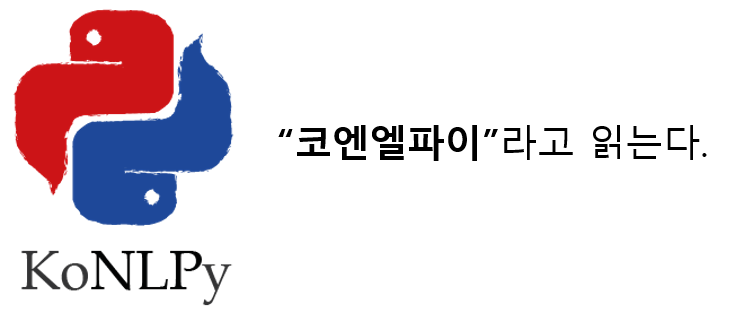

In [ ]:
# ======= 형태소 분석을 위해 한글 분석 모듈 konlpy를 설치한다. =============
!python -m pip install konlpy
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 18.2MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
KoNLPy version...: 0.5.2


In [ ]:
# 한국어 텍스트 분석에 필요한 모듈(konlpy)의 Open Korean Text 형태소 분석기를 불러온다.
from konlpy.tag import Okt  

# Open Korean Text 형태소 분석기 객체를 생성한다.
okt = Okt() 
    
# 긍정 리뷰의 각 문장을 꺼낸 후 형태소 분석기를 통해 명사만 추려내 리스트에 담는다.
nouns = [noun for sent in pos_comments for noun in okt.nouns(sent)]
len(nouns)

from collections import Counter

# nouns 리스트에 있는 서로 다른 명사의 개수 구한다. 
count = Counter(nouns)    
len(count)

# 가장 자주 출현하는 명사 100개를 추출한다.
data = count.most_common(100)
data[:5]

# --- 한글 워드 클라우드를 그리기 위해 한글 폰트를 설치한다.
# 한글 폰트를 설치한다.
!apt -qq -y install fonts-nanum
 
# 나눔바른고딕(NanumBarunGothic)을 사용하기 위해 경로를 포함시킨다.
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='white',
).generate_from_frequencies(dict(data))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10))  # width, height in inches
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

## 도전과제!

여러분이 원하는 영화 선정 후 모든 리뷰 데이터 수집 후 긍정 리뷰, 부정 리뷰 각각의 워드 클라우드를 만들고 비교해 보세요.

## 도전의 도전 과제!

여러분이 흥미 있는 기사를 선정 후 기사의 HTML 코드를 분석해서 파이썬 코드에 반영해 기사에 대한 댓글을 분석하는 워드 클라우드를 만들어 보세요.
